In [56]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
%matplotlib inline
from datetime import timedelta


import warnings
warnings.filterwarnings("ignore")

In [57]:
# Load data from 2019-01-26 to 2023-01-26
df = pd.read_csv('AAPL_returns.csv', index_col='Date', parse_dates=True)
df

,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,127.874939,-0.024719
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.455963,0.012364
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.098267,-0.033662
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.367035,0.034123
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.483627,0.008631
...,...,...,...,...,...,...,...
2021-03-26,121.480003,118.919998,120.349998,121.209999,94071200.0,119.951202,0.005142
2021-03-29,122.580002,120.730003,121.650002,121.389999,80819200.0,120.129311,0.001485
2021-03-30,120.400002,118.860001,120.110001,119.900002,85671900.0,118.654793,-0.012274


<AxesSubplot: xlabel='Date'>

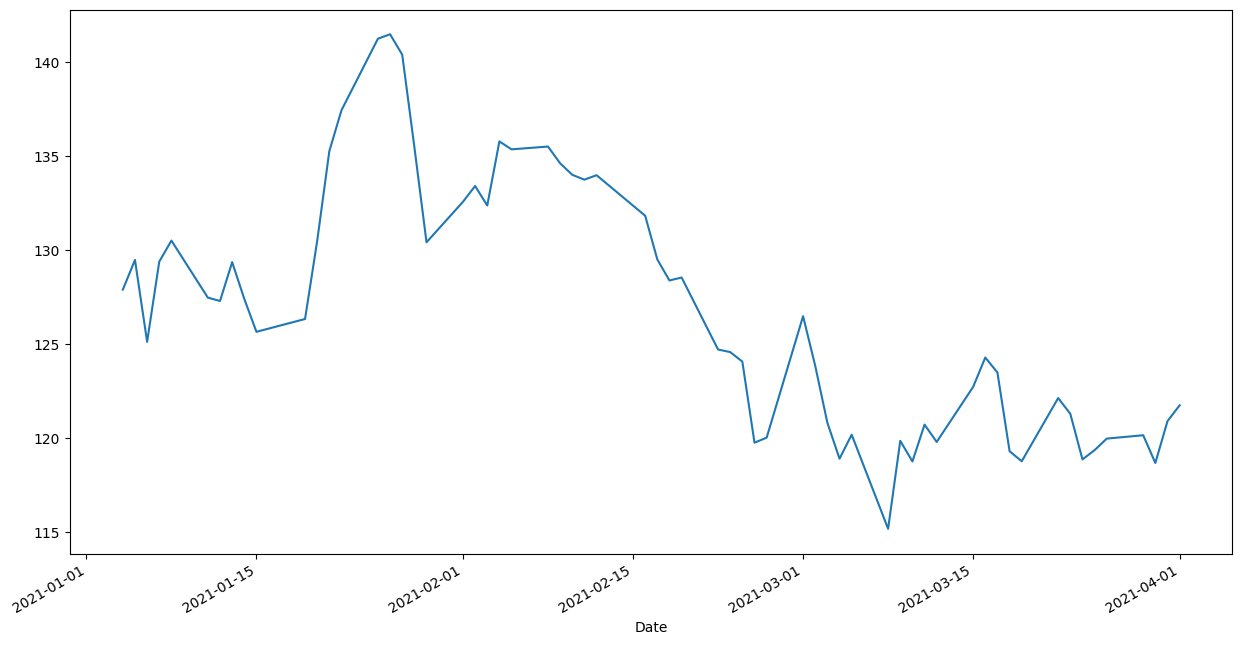

In [58]:
# Plot the data
df['Adj Close'].plot(figsize=(15,8))

In [59]:
# df_log = np.log(df['Adj Close']/df['Adj Close'].shift(1)).to_frame()
# df_log = df_log.dropna()
# df_log


In [60]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,returns
count,62.000000,62.000000,62.000000,62.000000,6.200000e+01,62.000000,62.000000
mean,129.977904,126.597742,128.532581,128.271613,1.096714e+08,126.866392,-0.000987
std,6.696031,6.500335,6.705765,6.738133,2.964228e+07,6.610091,0.020753
min,120.400002,116.209999,119.029999,116.360001,6.014510e+07,115.151558,-0.041673
25%,123.902502,120.587502,122.647497,121.984999,8.894782e+07,120.718130,-0.014778
50%,129.860001,126.810001,128.385002,127.810001,1.034714e+08,126.388264,-0.001658
75%,135.710003,132.324993,134.212505,133.752502,1.196941e+08,132.215115,0.011957
max,145.089996,141.369995,143.600006,143.160004,1.855495e+08,141.461838,0.053851


In [61]:
# Check for stationarity
timeseries = df[['returns']]
adftest = adfuller(timeseries) 
print('ADF Statistic: %f' % adftest[0])
print('p-value: %f' % adftest[1])
for key, value in adftest[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.139095
p-value: 0.000000
	1%: -3.542
	5%: -2.910
	10%: -2.593


<Figure size 2000x600 with 0 Axes>

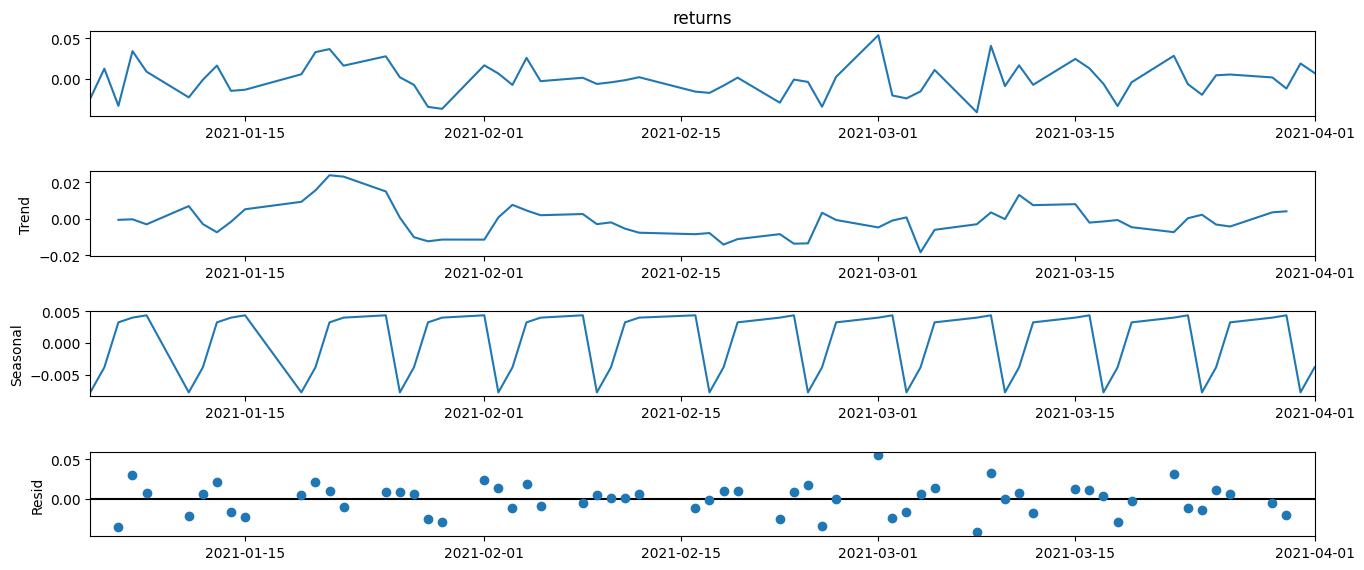

In [62]:
decomp_result = seasonal_decompose(df['returns'], period=5)
plt.figure(figsize=(20,6))
decomp_result.plot().set_size_inches(16,6)
plt.show()

<AxesSubplot: xlabel='Date'>

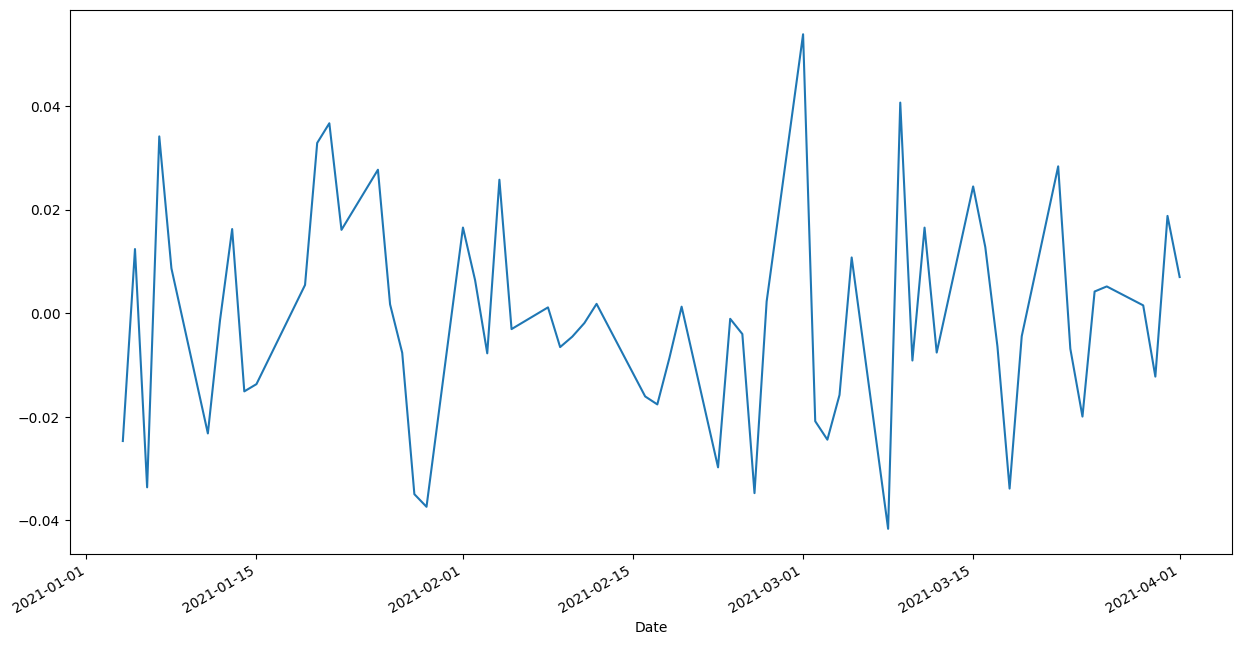

In [63]:
df['returns'].plot(figsize=(15,8))

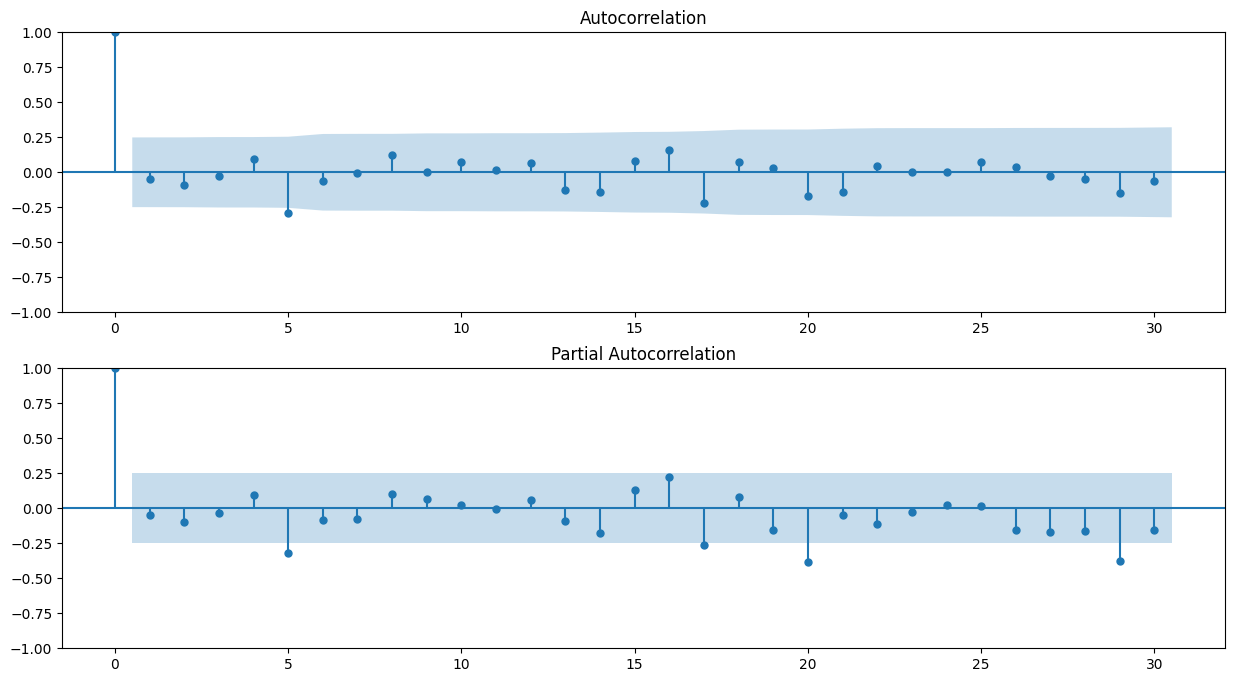

In [64]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,8))
plot_acf(df['returns'], lags=30, ax=ax1)
plot_pacf(df['returns'], lags=30, ax= ax2)
plt.show()


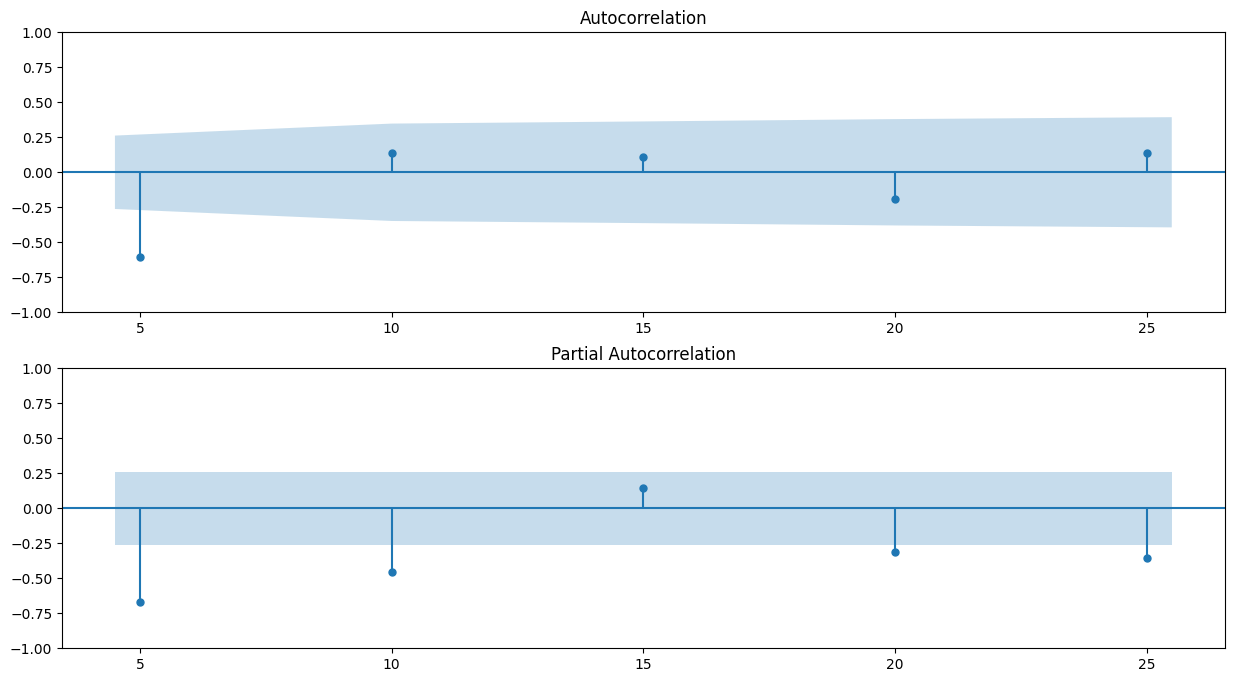

In [65]:
# do seasonal differencing 
df_return_seasonal = df['returns'].diff(5).dropna().to_frame()
# plot the seasonal differenced data 
lags = [5, 10, 15, 20, 25]
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,8))
plot_acf(df_return_seasonal, lags=lags, ax = ax1)
plot_pacf(df_return_seasonal, lags=lags, ax= ax2)
plt.show()

> The Seasonal ACF and PACF look like an MA(1) model. We select the model that combines both of these.

In [66]:
order_aic_bic=[]
for p in range(8):
    for q in range(8):
        try:
            m = SARIMAX(df['returns'], order=(p, 0, q), seasonal_order=(2, 1, 1, 5)).fit()
            order_aic_bic.append((p, q, m.aic, m.bic))
            # print("{}, {} AIC:{} BIC:{}".format(i, j, m.aic, m.bic))
        except:
            print(p, q, None, None)  

0 5 None None
0 6 None None
0 7 None None
1 5 None None
1 6 None None
1 7 None None
2 5 None None
2 6 None None
2 7 None None
3 5 None None
3 6 None None
3 7 None None
4 5 None None
4 6 None None
4 7 None None
5 0 None None
5 1 None None
5 2 None None
5 3 None None
5 4 None None
5 5 None None
5 6 None None
5 7 None None
6 0 None None
6 1 None None
6 2 None None
6 3 None None
6 4 None None
6 5 None None
6 6 None None
6 7 None None
7 0 None None
7 1 None None
7 2 None None
7 3 None None
7 4 None None
7 5 None None
7 6 None None
7 7 None None


In [67]:
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

    p  q         AIC         BIC
0   0  0 -263.386186 -255.213980
5   1  0 -261.421894 -251.206638
1   0  1 -261.333958 -251.118701
22  4  2 -257.619942 -237.189429
2   0  2 -256.417433 -244.159126
10  2  0 -256.399873 -244.141565
6   1  1 -256.150466 -243.892159
3   0  3 -255.931616 -241.630257
11  2  1 -255.713743 -241.412384
20  4  0 -254.857781 -238.513371
15  3  0 -254.734218 -240.432859
7   1  2 -254.421277 -240.119918
4   0  4 -253.999551 -237.655141
16  3  1 -253.282786 -236.938376
24  4  4 -252.990144 -228.473529
12  2  2 -252.464032 -236.119622
8   1  3 -252.462343 -236.117933
21  4  1 -252.223665 -233.836204
14  2  4 -252.205491 -231.774978
17  3  2 -252.073213 -233.685752
9   1  4 -252.001991 -233.614530
13  2  3 -250.376110 -231.988649
19  3  4 -248.852920 -226.379356
23  4  3 -248.673563 -226.200000
18  3  3 -248.570071 -228.139558
    p  q         AIC         BIC
0   0  0 -263.386186 -255.213980
5   1  0 -261.421894 -251.206638
1   0  1 -261.333958 -251.118701
2   0  2 -

In [68]:
# SARIMA Modelmodel 
model = SARIMAX(df['returns'], order=(0, 0, 0), seasonal_order=(2, 1, 1, 5))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                   returns   No. Observations:                   62
Model:             SARIMAX(2, 1, [1], 5)   Log Likelihood                 135.693
Date:                   Sun, 05 Feb 2023   AIC                           -263.386
Time:                           12:16:27   BIC                           -255.214
Sample:                                0   HQIC                          -260.210
                                    - 62                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5       -0.3337      0.211     -1.584      0.113      -0.747       0.079
ar.S.L10      -0.0276      0.201     -0.137      0.891      -0.422       0.367
ma.S.L5       -0.9787      1.529     -0.640      0.522      -3.975       2.018
sigma2         0.0004      0.001      0.706      0.480      -0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.70   Prob(JB):                         0.48
Heteroskedasticity (H):               0.64   Skew:                             0.33
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

>Prob(Q) is the p-value associated with the null hypothesis that the residuals have no correlation structure </br>
>Prob(JB) is the p-value associated with the null hypothesis that the residuals are Gaussian normally distributed.


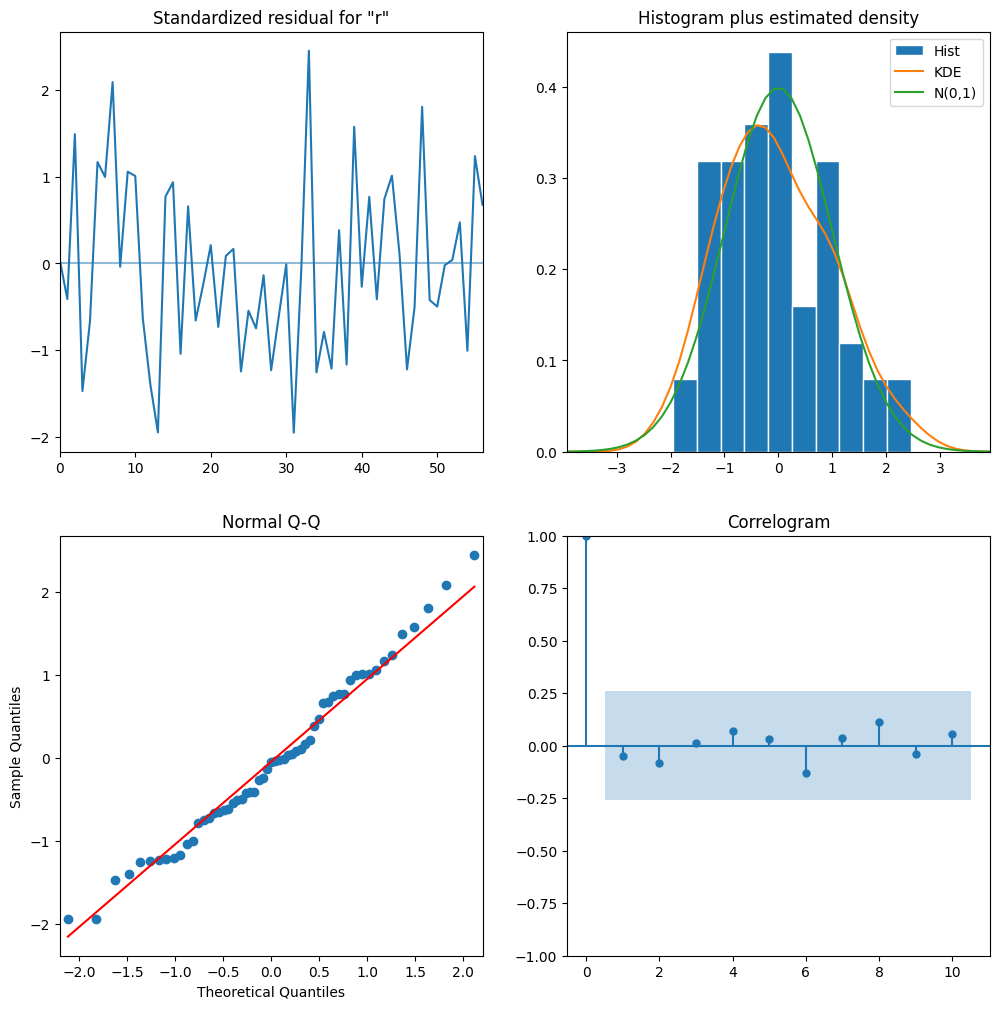

In [69]:
results.plot_diagnostics(figsize=(12, 12))
plt.show()

- <b>Standardized residuals plot (top-left plot) </b>
    - If our model is working correctly, there should be no obvious pattern in the residuals. 
- <b>Histogram plus estimated density plot (top-right) </b>
    - the green line represent a normal distribution, so the orange line should close to green line as much as possible, which indicates the residual distribution follow a normal distribution.
- <b>Normal Q-Q plot</b>
    - If the distribution of the residuals is normal, then all the points should lie along the red line, except for some values at the end.
- <b>Correlogram plot</b>
    - The correlogram plot is the ACF plot of the residuals rather than the data. 95% of the correlations for lag greater than zero should not be significant (within the blue shades). If there is a significant correlation in the residuals, it means that there is information in the data that was not captured by the model.

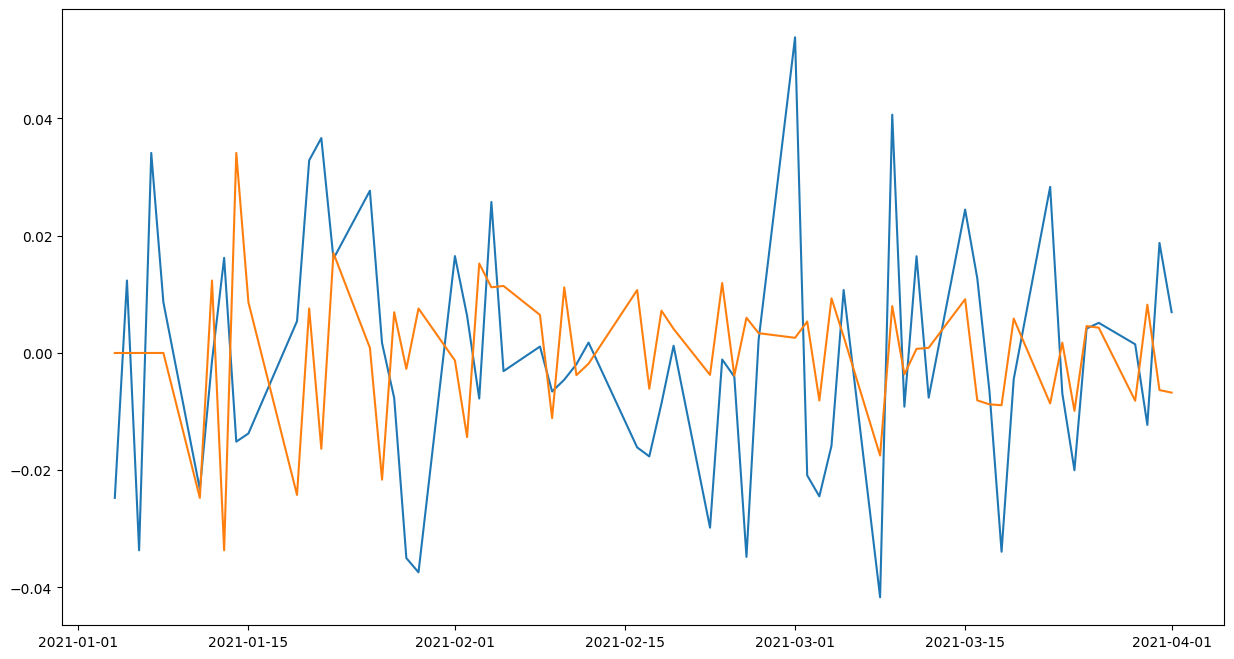

In [70]:
plt.figure(figsize=(15,8))
plt.plot(df['returns'])
plt.plot(results.fittedvalues)


## Rolling Forecast(SARIMA)

In [71]:
train_data = df.loc[:'2021-03-15', :]
test_data = df.loc['2021-03-15':, :]

Text(0.5, 1.0, 'SARIMA Rolling Forecast')

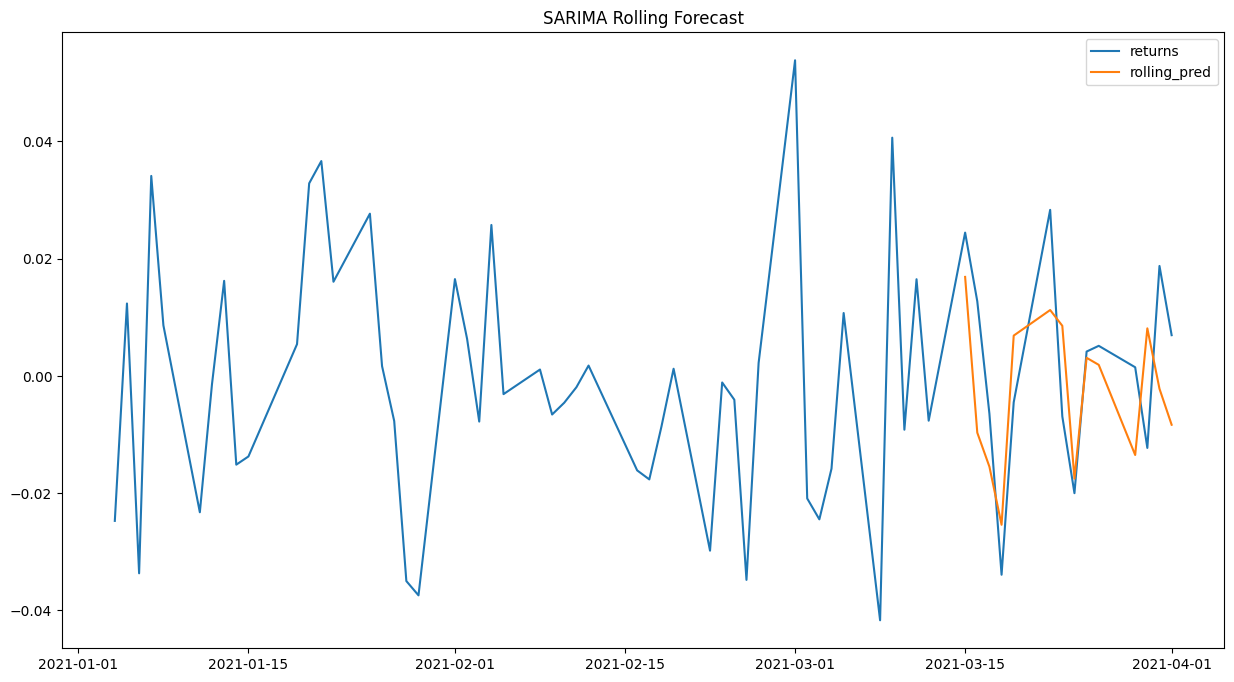

In [72]:
from datetime import timedelta
for train_step in test_data.index:
    rolling_train_data = df.loc[:train_step, 'returns']
    model = SARIMAX(rolling_train_data, order=(1, 0, 0), seasonal_order=(2, 1, 1, 5))
    model_fit = model.fit()
    pred = model_fit.predict(train_step)
    df.loc[train_step, 'rolling_pred'] = pred.item()

plt.figure(figsize=(15,8))
plt.plot(df['returns'])
plt.plot(df['rolling_pred'])
plt.legend(['returns', 'rolling_pred'])
plt.title('SARIMA Rolling Forecast')

In [73]:
print("Mean Absolute Percent Error(MAPE) {}".format(abs((df['returns']-df['rolling_pred'])/df['returns']).mean()))
print("Root Mean Squared Error(RMSE) {}".format(pow((df['returns']-df['rolling_pred']), 2).mean()**0.5))
print("Weighted Absolute Percentage Error (WAPE) {}".format(abs(df['returns']-df['rolling_pred']).sum() /abs(df['returns']).sum()))

Mean Absolute Percent Error(MAPE) 1.7974857209210504
Root Mean Squared Error(RMSE) 0.013896003532871178
Weighted Absolute Percentage Error (WAPE) 0.16943767073327917


metrics source: https://docs.aws.amazon.com/forecast/latest/dg/metrics.html#metrics-mape
> MAPE is useful for cases where values differ significantly between time points and outliers have a significant impact</br>
> RMSE is sensitive to outliers than other accuracy </br>
> WAPE measures the overall deviation of forecasted values from observed values